# Figure 3

Load librairies

In [1]:
import numpy as np                      # Data
import pandas as pd                     # Data 
import matplotlib.pyplot as plt         # Plot
from matplotlib.lines import Line2D     # Plot

Use Latex Font

In [2]:
""" plt.rcParams.update({'text.usetex': True,
                     'font.family': 'serif',
                     'font.serif': ['Computer Modern'],
                     'font.size': 11,
                     'axes.labelsize': 11,
                     'legend.fontsize': 11,
                     'xtick.labelsize': 9,
                     'ytick.labelsize': 9})   """

" plt.rcParams.update({'text.usetex': True,\n                     'font.family': 'serif',\n                     'font.serif': ['Computer Modern'],\n                     'font.size': 11,\n                     'axes.labelsize': 11,\n                     'legend.fontsize': 11,\n                     'xtick.labelsize': 9,\n                     'ytick.labelsize': 9})   "

# Data & Methods

Read capacity factor verification data from 2014 to 2023

In [3]:
df_cf_wind = pd.read_csv('../Data/cf_verification_2014-2023.csv',
                         index_col = 0,
                         parse_dates = True,
                         usecols = ['datetime', 'Wind OBS', 'Wind ATL', 'Wind C3S GRD']).dropna()

Read wind turbine power curves data

In [4]:
df_turbines = pd.read_csv('../Data/power_curve.csv',
                          index_col = 0)

## Plot

In [5]:
bins = np.arange(-0.01, 1.01, 0.02)

color_atl = '#ff7f0e'
color_c3s = '#4a90a4'

cm = 1 / 2.54

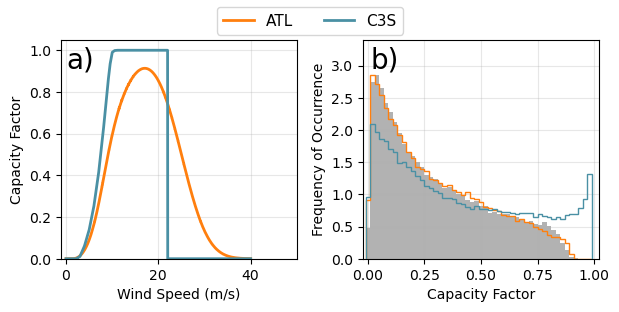

In [6]:
fig, ax = plt.subplots(1, 2,
                       figsize=(16*cm, 8*cm))

i = 0 # Left panel
ax[i].plot(df_turbines.index, df_turbines['Enercon.E112.4500'],
           lw = 2,
           color = color_atl,
           zorder = 2)
ax[i].plot(df_turbines.index, df_turbines['Vestas.V136.3450'],
           lw = 2,
           color = color_c3s,
           zorder = 2)

ax[i].set_xlabel('Wind Speed (m/s)')
ax[i].set_xlim(-1,50)
ax[i].set_ylabel('Capacity Factor')
ax[i].set_ylim(0)
ax[i].grid(alpha = 0.3, zorder = 0)
ax[i].text(0.02, 0.97,
           'a)',
           fontsize = 20,
           ha = 'left', va = 'top',
           transform = ax[0].transAxes)


i = 1 # Right panel
hist_obs, _, _ = ax[i].hist(df_cf_wind['Wind OBS'], 
                                bins = bins, 
                                density = True, 
                                color = 'k', 
                                alpha = 0.3, 
                                zorder = 1)

hist_atl, _, _ = ax[i].hist(df_cf_wind['Wind ATL'], 
                            bins = bins, 
                            density = True, 
                            color = color_atl,
                            histtype = 'step', 
                            lw = 2,
                            zorder = 3)

hist_c3s, _, _ = ax[i].hist(df_cf_wind['Wind C3S GRD'], 
                            bins = bins, 
                            density = True, 
                            color = color_c3s,
                            histtype = 'step', 
                            lw = 2, 
                            zorder = 3)

# X-axis
ax[i].set_xlabel('Capacity Factor')
ax[i].set_xlim(-0.02, 1.02)

# Y-axis
ax[i].set_ylabel('Frequency of Occurrence')
ax[i].set_ylim(0, 3.4)

# Grid
ax[i].grid(alpha = 0.3, zorder = 0)

# Labels
ax[i].text(0.03, 0.97,
           'b)',
           fontsize = 20,
           ha = 'left', va = 'top',
           transform = ax[1].transAxes)

# Legend
custom_lines = [Line2D([0], [0], color = color_atl, lw = 2),
                Line2D([0], [0], color = color_c3s, lw = 2)]
fig.legend(handles = custom_lines,
           labels = ['ATL', 'C3S'],
           fontsize = 11,
           loc = 'upper center',
           ncols = 2)
fig.tight_layout()
fig.subplots_adjust(top=0.88)

# fig.savefig('03_verification_power_curve.pdf', bbox_inches = 'tight')